In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

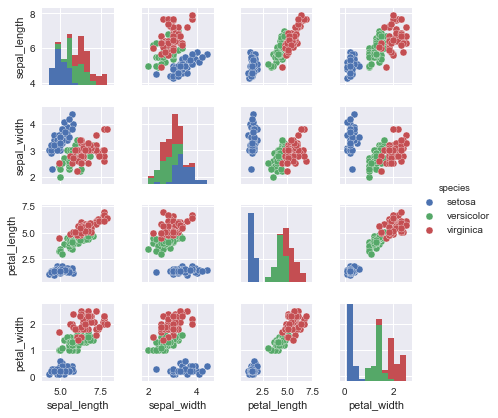

In [13]:
# visualize the data
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', size=1.5)

In [21]:
#Â format the Features matrix
iris.shape
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 5)

In [24]:
# extract the Target array
Y_iris = iris['species']
Y_iris.shape

(150,)

### Supervised learning: Iris classification

In [33]:
# Now we look at a Gaussian naive Bayes model
# First, setup the training and test data 
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, Y_iris, random_state=1)

In [38]:
# 1. choose mode class
from sklearn.naive_bayes import GaussianNB 
# 2. instantiate model
model = GaussianNB()
# 3. fit model to data
model.fit(Xtrain, ytrain)
# 4. predict on new data
y_model = model.predict(Xtest)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)
# check the accuracy of the GassianNB model against this dataset

0.97368421052631582

### Unsupervised learning: Iris dimensionality

In [50]:
# 1. choose the model class
from sklearn.decomposition import PCA
# 2. instantiate the model with hyperparameters
model = PCA(n_components=2)
# 3. fit to data
model.fit(X_iris) # note that y is not specified
# 4. transform the data to two dimensions
X_2D = model.transform(X_iris)

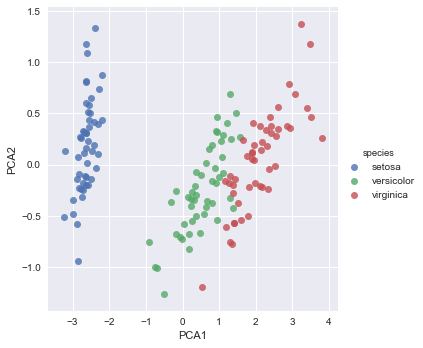

In [51]:
# plot the results by inserting into the original Iris DataFrame
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)
# species are pretty well separated even though the PCA algorithm had no knowledge of the species

### Unsupervised learning: Iris clustering

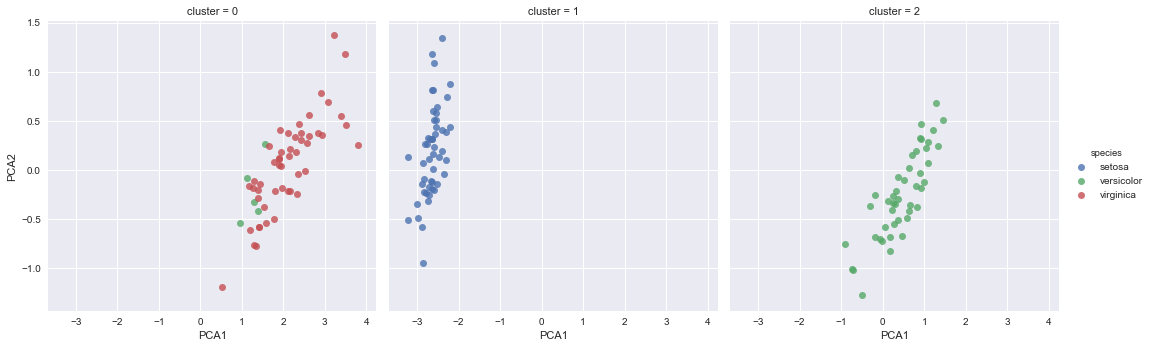

In [57]:
# 1. choose model class
from sklearn.mixture import GaussianMixture
# 2. instantiate model with hyperparameters
model = GaussianMixture(n_components=3,
           covariance_type='full')
# 3. fit to data. Note no 'y'
model.fit(X_iris)
# 4. determine cluset labels
y_gmm = model.predict(X_iris)


iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
          col='cluster', fit_reg=False)
